## EDA- Regresión

### 1. Importamos las librerías necesarias.

In [113]:
# Herramientas para EDA
import pandas as pd
import numpy as np
import sidetable as stb
from datetime import timedelta
from datetime import date, datetime
import random 

# Herramientas para la Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.gridspec import GridSpec

# Transformación de datos
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Estadísticos
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats

# Configuración de los warning
import warnings
warnings.filterwarnings('ignore')


plt.rcParams["figure.figsize"] = (16,8)

### 2. Abrimos el archivo con el que vamos a trabajar.

In [114]:
df= pd.read_csv('../archivos/bikes_limpio.csv', index_col=0)
df.head()

,fecha,estacion,año,mes,dias_festivos,dias_laborales,clima,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,0,Nublado,14.110847,18.18125,80.5833,10.749882,331,654,985,lunes
1,2018-01-02,invierno,0,1,No Festivo,0,Nublado,14.902598,17.68695,69.6087,16.652113,131,670,801,martes
2,2018-01-03,invierno,0,1,No Festivo,1,Soleado,8.050924,9.47025,43.7273,16.636703,120,1229,1349,miercoles
3,2018-01-04,invierno,0,1,No Festivo,1,Soleado,8.200000,10.60610,59.0435,10.739832,108,1454,1562,jueves
4,2018-01-05,invierno,0,1,No Festivo,1,Soleado,9.305237,11.46350,43.6957,12.522300,82,1518,1600,viernes


### 3. Empezamos la exploración de nuestra base de datos limpia, para empezar a preparar nuestro algoritmo predictivo.

In [115]:
df.shape

(730, 15)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 730 non-null    object 
 1   estacion              730 non-null    object 
 2   año                   730 non-null    int64  
 3   mes                   730 non-null    int64  
 4   dias_festivos         730 non-null    object 
 5   dias_laborales        730 non-null    int64  
 6   clima                 730 non-null    object 
 7   temperatura           730 non-null    float64
 8   sensacion_termica     730 non-null    float64
 9   humedad               730 non-null    float64
 10  velocidad_viento      730 non-null    float64
 11  clientes_casuales     730 non-null    int64  
 12  clientes_registrados  730 non-null    int64  
 13  total_bicis           730 non-null    int64  
 14  dia_semana            730 non-null    object 
dtypes: float64(4), int64(6)

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
año,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mes,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
dias_laborales,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
temperatura,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
sensacion_termica,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
humedad,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
velocidad_viento,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
clientes_casuales,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
clientes_registrados,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
total_bicis,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


In [118]:
df.describe(include='object').T

,count,unique,top,freq
fecha,730,730,2018-01-01,1
estacion,730,4,verano,188
dias_festivos,730,12,No Festivo,709
clima,730,3,Soleado,463
dia_semana,730,7,lunes,105


In [119]:
df.stb.missing()

,missing,total,percent
fecha,0,730,0.0
estacion,0,730,0.0
año,0,730,0.0
mes,0,730,0.0
dias_festivos,0,730,0.0
dias_laborales,0,730,0.0
clima,0,730,0.0
temperatura,0,730,0.0
sensacion_termica,0,730,0.0
humedad,0,730,0.0


3.1 Comprobamos la correlación entre todas nuestras variables.

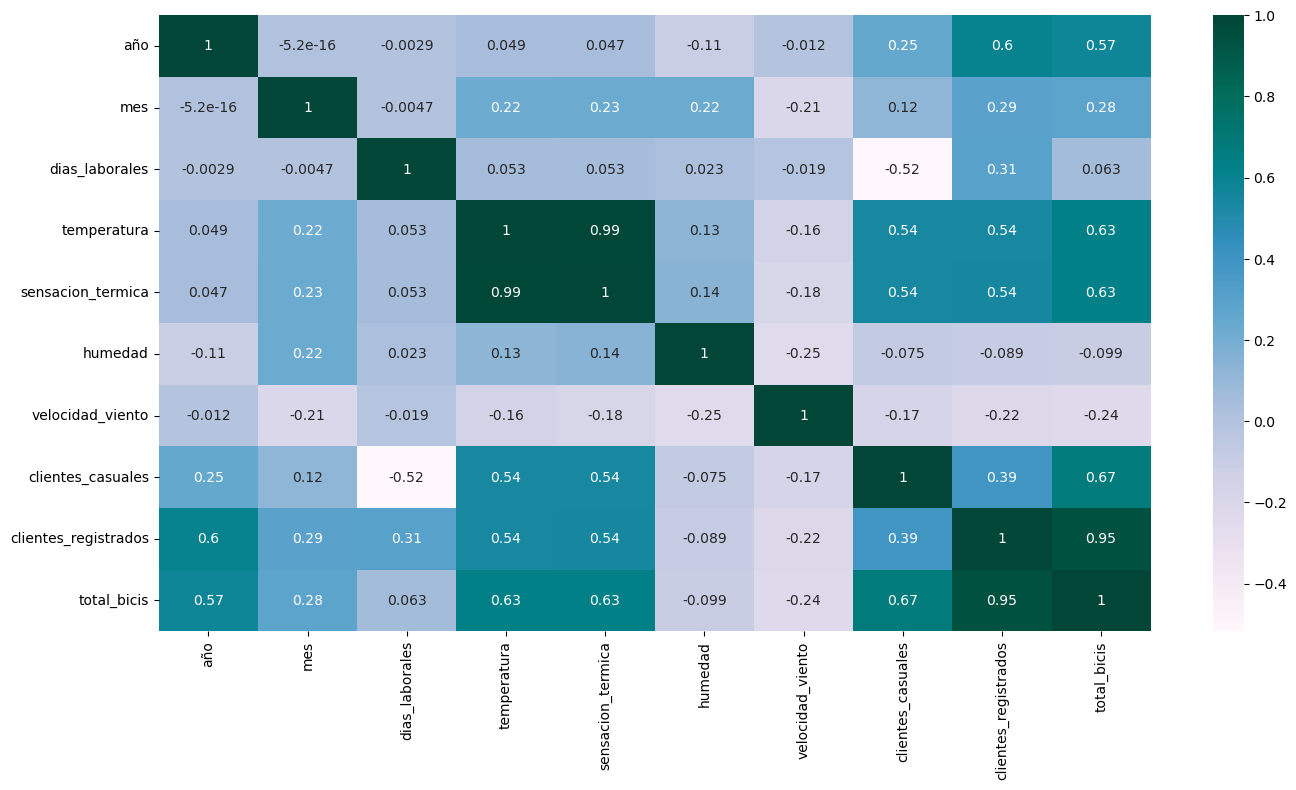

In [120]:
sns.heatmap(df.corr(), cmap= 'PuBuGn', annot= True);

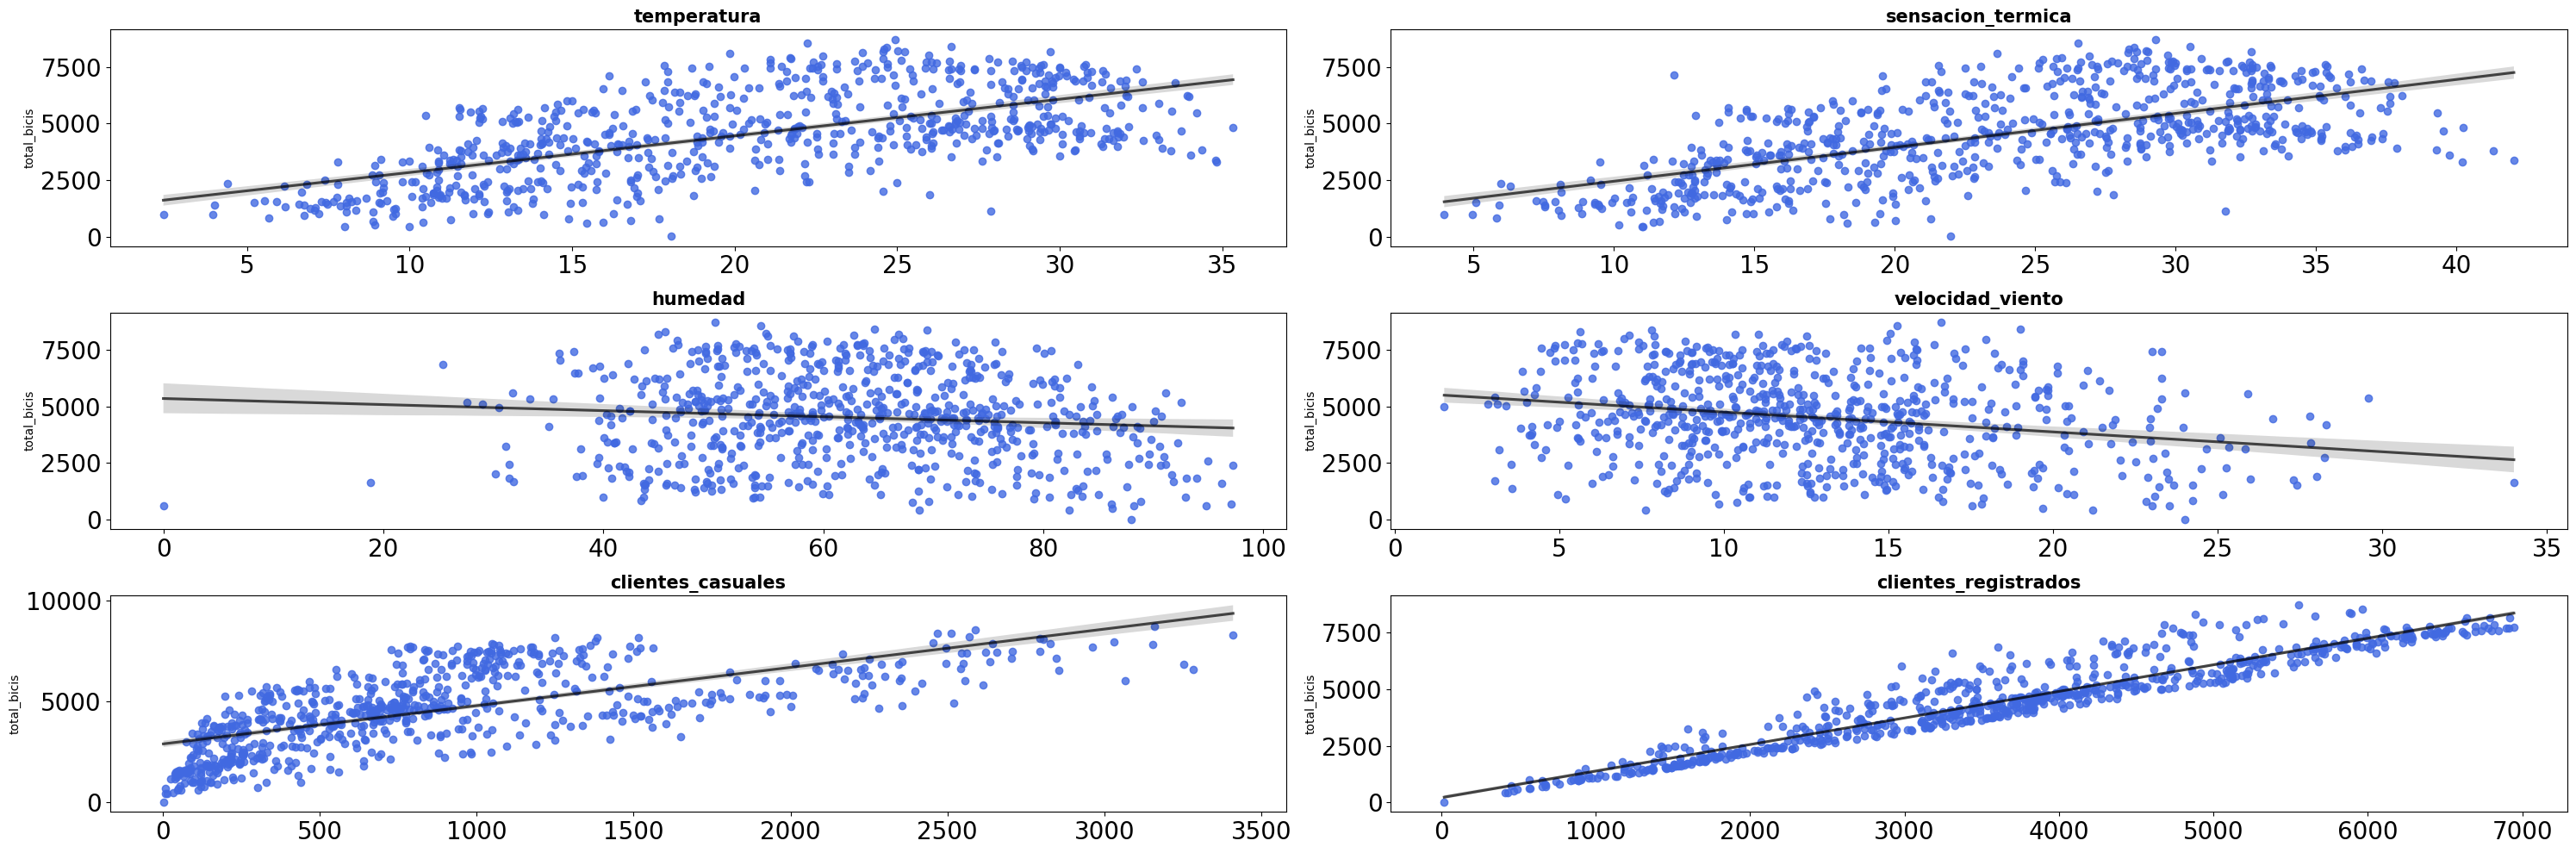

In [121]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))


# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df.select_dtypes(include = np.number).drop(['total_bicis','año','mes','dias_laborales'], axis=1)
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'total_bicis',
        color = 'royalblue',
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    fig.tight_layout()
    plt.savefig('regplots.png')
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 


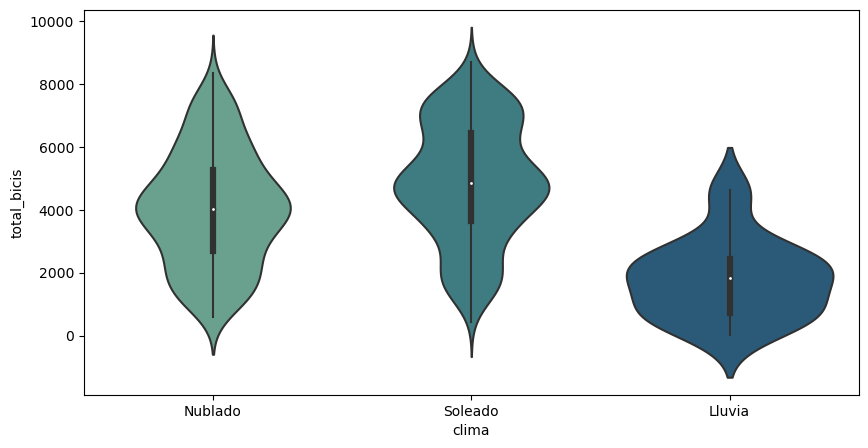

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'clima',
    y       = 'total_bicis',
    data    = df,
    palette = 'crest',
    ax      = ax
);

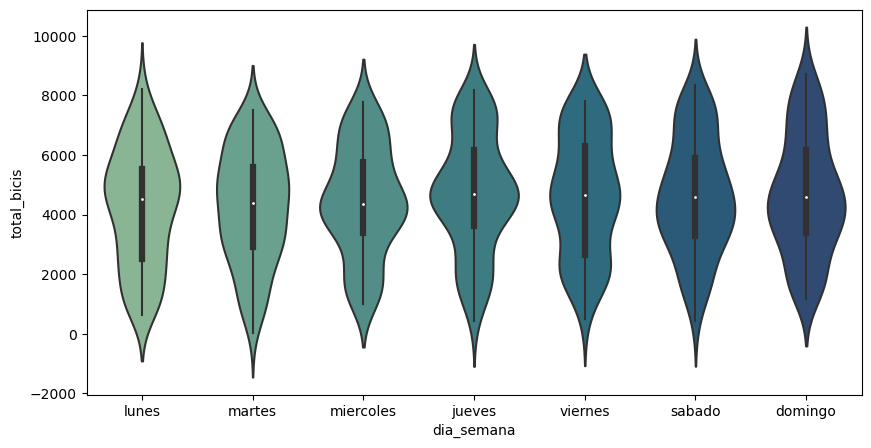

In [123]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = 'dia_semana',
    y       = 'total_bicis',
    data    = df,
    palette = 'crest',
    ax      = ax
);

3.2 Comprobamos la normalidad de nuestra variable respuesta.

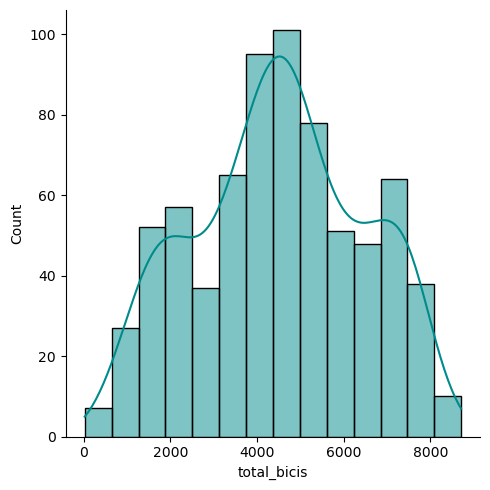

In [124]:
sns.displot(df['total_bicis'], kde = True, color = "darkcyan");

In [125]:
stats.shapiro(df['total_bicis'])

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

3.3. Realizamos un Anova.

In [126]:
df.columns

Index(['fecha', 'estacion', 'año', 'mes', 'dias_festivos', 'dias_laborales',
       'clima', 'temperatura', 'sensacion_termica', 'humedad',
       'velocidad_viento', 'clientes_casuales', 'clientes_registrados',
       'total_bicis', 'dia_semana'],
      dtype='object')

In [127]:
lm = ols('total_bicis ~ año + mes + dias_festivos + dias_laborales + clima + temperatura + sensacion_termica + humedad + velocidad_viento + clientes_casuales + clientes_registrados + dia_semana',  data = df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
dias_festivos,11.0,8.974037e+07,8.158215e+06,1.982704e+30,0.0
clima,2.0,2.599449e+08,1.299724e+08,3.158741e+31,0.0
dia_semana,6.0,2.019942e+07,3.366571e+06,8.181830e+29,0.0
año,1.0,8.275131e+08,8.275131e+08,2.011118e+32,0.0
mes,1.0,2.325304e+08,2.325304e+08,5.651223e+31,0.0
dias_laborales,1.0,2.292047e+06,2.292047e+06,5.570399e+29,0.0
temperatura,1.0,6.823760e+08,6.823760e+08,1.658389e+32,0.0
sensacion_termica,1.0,8.767677e+06,8.767677e+06,2.130822e+30,0.0
humedad,1.0,2.684779e+06,2.684779e+06,6.524860e+29,0.0
velocidad_viento,1.0,2.458340e+07,2.458340e+07,5.974543e+30,0.0


In [128]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_bicis   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.372e+31
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:12:49   Log-Likelihood:                 18633.
No. Observations:                 730   AIC:                        -3.721e+04
Df Residuals:                     701   BIC:                        -3.708e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    9.095e-12   1.76e-12      5.168      0.000    5.64e-12    1.26e-11
dias_festivos[T.Columbus Day]                2.956e-12   2.08e-12      1.421      0.156   -1.13e-12    7.04e-12
dias_festivos[T.Independence Day]           -2.819e-11   2.08e-12    -13.569      0.000   -3.23e-11   -2.41e-11
dias_festivos[T.Labor Day]                  -2.046e-11   2.07e-12     -9.870      0.000   -2.45e-11   -1.64e-11
dias_festivos[T.Martin Luther King Jr. Day] -6.366e-12   2.08e-12     -3.054      0.002   -1.05e-11   -2.27e-12
dias_festivos[T.Memorial Day]               -1.455e-11   2.09e-12     -6.948      0.000   -1.87e-11   -1.04e-11
dias_festivos[T.New Year's Day]             -1.592e-12   2.06e-12     -0.771      0.441   -5.64e-12    2.46e-12
dias_festivos[T.No Festivo]                 -1.057e-11   1.48e-12     -7.133      0.000   -1.35e-11   -7.66e-12
dias_festivos[T.Thanksgiving]               -1.637e-11   2.08e-12     -7.878      0.000   -2.05e-11   -1.23e-11
dias_festivos[T.Veterans Day]               -1.774e-11   2.07e-12     -8.576      0.000   -2.18e-11   -1.37e-11
dias_festivos[T.Veterans Day (Observed)]    -4.547e-12   2.53e-12     -1.800      0.072   -9.51e-12    4.12e-13
dias_festivos[T.Washington's Birthday]      -2.137e-11   2.09e-12    -10.236      0.000   -2.55e-11   -1.73e-11
clima[T.Nublado]                            -2.842e-13   5.06e-13     -0.561      0.575   -1.28e-12     7.1e-13
clima[T.Soleado]                            -3.411e-13   5.46e-13     -0.624      0.533   -1.41e-12    7.32e-13
dia_semana[T.jueves]                         1.307e-12   3.16e-13      4.139      0.000    6.87e-13    1.93e-12
dia_semana[T.lunes]                          2.842e-14   3.29e-13      0.086      0.931   -6.18e-13    6.75e-13
dia_semana[T.martes]                        -4.263e-14   2.96e-13     -0.144      0.885   -6.23e-13    5.38e-13
dia_semana[T.miercoles]                     -1.634e-13   3.05e-13     -0.536      0.592   -7.63e-13    4.36e-13
dia_semana[T.sabado]                         1.023e-12   3.07e-13      3.337      0.001    4.21e-13    1.63e-12
dia_semana[T.viernes]                        6.111e-13   3.13e-13      1.954      0.051   -2.82e-15    1.22e-12
año                                          6.395e-13   2.42e-13      2.644      0.008    1.65e-13    1.11e-12
mes                                         -8.882e-15   2.61e-14     -0.340      0.734   -6.01e-14    4.24e-14
dias_laborales                               4.974e-13   3.48e-13      1.429      0.154   -1.86e-13    1.18e-12
temperatura                                  1.776e-13   8.02e-14      2.214      0.027    2.01e-14    3.35e-13
sensacion_termica                           -1.279e-13   7.

3.4. Probamos a normalizar nuestros datos con dos métodos distintos, y no lo conseguimos, por lo que la distribución normal queda descartada.

In [129]:
df["total_bicis_norm"] = df["total_bicis"].apply(lambda x: math.sqrt(x))

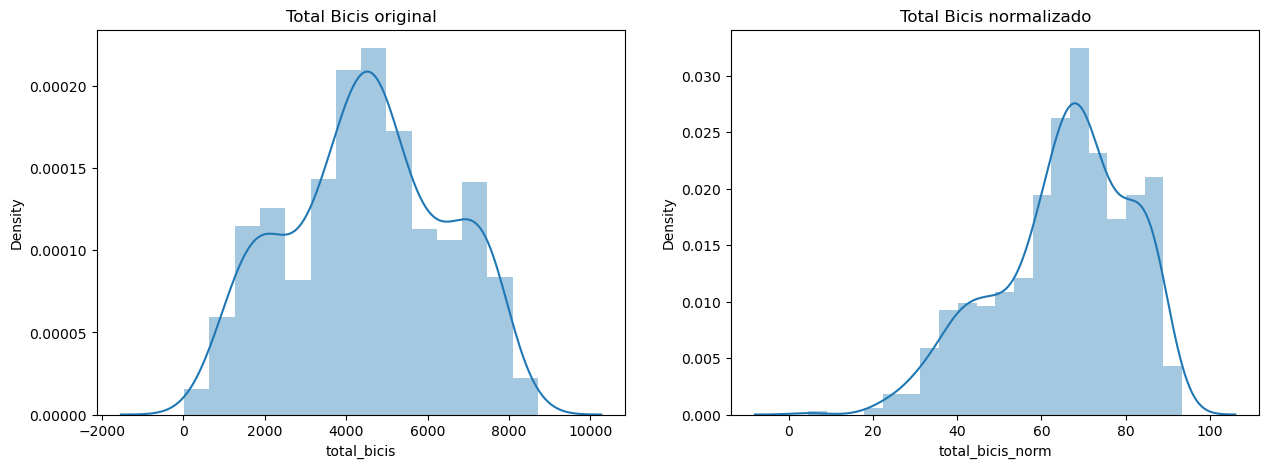

In [130]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Total Bicis original')
axes[1].set_title('Total Bicis normalizado')

sns.distplot(df["total_bicis"] ,ax = axes[0])
sns.distplot(df["total_bicis_norm"], ax = axes[1]);

In [131]:
stats.shapiro(df["total_bicis_norm"])

ShapiroResult(statistic=0.9646831154823303, pvalue=2.879613214545884e-12)

In [132]:

df['total_bicis_norm'], lambda_ajustada = stats.boxcox(df['total_bicis'])

In [133]:
lambda_ajustada

0.8861455779958503

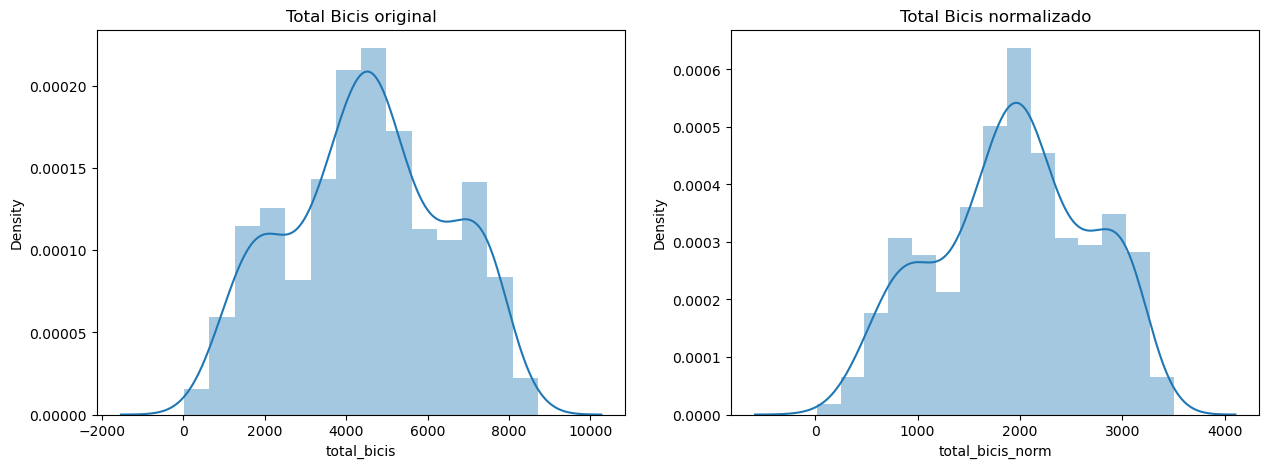

In [134]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Total Bicis original')
axes[1].set_title('Total Bicis normalizado')

sns.distplot(df['total_bicis'] ,ax = axes[0])
sns.distplot(df['total_bicis_norm'], ax = axes[1]);

In [135]:
stats.shapiro(df["total_bicis_norm"]) #los resultados siguen sin ser normales.

ShapiroResult(statistic=0.9801719784736633, pvalue=2.1925126603150602e-08)

In [136]:
df.drop('total_bicis_norm', axis= 1, inplace=True)

In [137]:
df.head()

,fecha,estacion,año,mes,dias_festivos,dias_laborales,clima,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,0,Nublado,14.110847,18.18125,80.5833,10.749882,331,654,985,lunes
1,2018-01-02,invierno,0,1,No Festivo,0,Nublado,14.902598,17.68695,69.6087,16.652113,131,670,801,martes
2,2018-01-03,invierno,0,1,No Festivo,1,Soleado,8.050924,9.47025,43.7273,16.636703,120,1229,1349,miercoles
3,2018-01-04,invierno,0,1,No Festivo,1,Soleado,8.200000,10.60610,59.0435,10.739832,108,1454,1562,jueves
4,2018-01-05,invierno,0,1,No Festivo,1,Soleado,9.305237,11.46350,43.6957,12.522300,82,1518,1600,viernes


### 4. Con los resultados que hemos obtenido, decidimos dividir nuestro dataframe en dos (clientes habituales - clientes registrados) para comprobar si los resultados varian.

In [138]:
df_casual = df.drop(['total_bicis', 'clientes_registrados'], axis = 1)
df_casual.head()

,fecha,estacion,año,mes,dias_festivos,dias_laborales,clima,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_casuales,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,0,Nublado,14.110847,18.18125,80.5833,10.749882,331,lunes
1,2018-01-02,invierno,0,1,No Festivo,0,Nublado,14.902598,17.68695,69.6087,16.652113,131,martes
2,2018-01-03,invierno,0,1,No Festivo,1,Soleado,8.050924,9.47025,43.7273,16.636703,120,miercoles
3,2018-01-04,invierno,0,1,No Festivo,1,Soleado,8.200000,10.60610,59.0435,10.739832,108,jueves
4,2018-01-05,invierno,0,1,No Festivo,1,Soleado,9.305237,11.46350,43.6957,12.522300,82,viernes


In [139]:
df_casual.to_csv('../archivos/bikes_casuales.csv')

In [140]:
df_registrados = df.drop(['total_bicis', 'clientes_casuales'], axis = 1)
df_registrados.head()

,fecha,estacion,año,mes,dias_festivos,dias_laborales,clima,temperatura,sensacion_termica,humedad,velocidad_viento,clientes_registrados,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,0,Nublado,14.110847,18.18125,80.5833,10.749882,654,lunes
1,2018-01-02,invierno,0,1,No Festivo,0,Nublado,14.902598,17.68695,69.6087,16.652113,670,martes
2,2018-01-03,invierno,0,1,No Festivo,1,Soleado,8.050924,9.47025,43.7273,16.636703,1229,miercoles
3,2018-01-04,invierno,0,1,No Festivo,1,Soleado,8.200000,10.60610,59.0435,10.739832,1454,jueves
4,2018-01-05,invierno,0,1,No Festivo,1,Soleado,9.305237,11.46350,43.6957,12.522300,1518,viernes


In [141]:
df_registrados.to_csv('../archivos/bikes_registrados.csv')

Teníamos la hipótesis de que los clientes casuales podrían ser en su mayoría turistas, y pensamos que eso podría afectar a los días de la semana o a los festivos. Después de realizar los EDA correspondientes, descartamos esta hipótesis y seguimos con el dataframe entero.

### 5. Eliminamos las columnas que no tienen correlación con nuestra respuesta y las que aparentemente, son dependientes y por lo tanto nos da información redundante.

In [142]:
df.drop(["dias_laborales", "clima", "sensacion_termica"], axis = 1, inplace=True)

In [143]:
df.head()

,fecha,estacion,año,mes,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana
0,2018-01-01,invierno,0,1,New Year's Day,14.110847,80.5833,10.749882,331,654,985,lunes
1,2018-01-02,invierno,0,1,No Festivo,14.902598,69.6087,16.652113,131,670,801,martes
2,2018-01-03,invierno,0,1,No Festivo,8.050924,43.7273,16.636703,120,1229,1349,miercoles
3,2018-01-04,invierno,0,1,No Festivo,8.200000,59.0435,10.739832,108,1454,1562,jueves
4,2018-01-05,invierno,0,1,No Festivo,9.305237,43.6957,12.522300,82,1518,1600,viernes


In [144]:
df.to_csv('../archivos/bikes_final.csv')